# ggplot sample 

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [46]:
theme_set(theme_grey(base_size=18))

In [3]:
options(repr.plot.width = 11, repr.plot.height = 11/16*8)

## Datasets

Rに組込みのdatasetsの中身を確認してみる。

データの解説は
https://qiita.com/wakuteka/items/95ac758070f6f4d89a96
を見ると良い。

In [30]:
library(help = datasets)

Documentation for package ‘datasets’


		Information on package ‘datasets’

Description:

Package:       datasets
Version:       3.6.3
Priority:      base
Title:         The R Datasets Package
Author:        R Core Team and contributors worldwide
Maintainer:    R Core Team <R-core@r-project.org>
Description:   Base R datasets.
License:       Part of R 3.6.3
Built:         R 3.6.3; ; 2020-02-29 15:32:10 UTC; unix

Index:

AirPassengers           Monthly Airline Passenger Numbers 1949-1960
BJsales                 Sales Data with Leading Indicator
BOD                     Biochemical Oxygen Demand
CO2                     Carbon Dioxide Uptake in Grass Plants
ChickWeight             Weight versus age of chicks on different diets
DNase                   Elisa assay of DNase
EuStockMarkets          Daily Closing Prices of Major European Stock
                        Indices, 1991-1998
Formaldehyde            Determination of Formaldehyde
HairEyeColor            Hair and Eye Color of Statistic

### ToothGrowth

ToothGrowthデータを分析してみる。

In [44]:
ToothGrowth %>% str

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


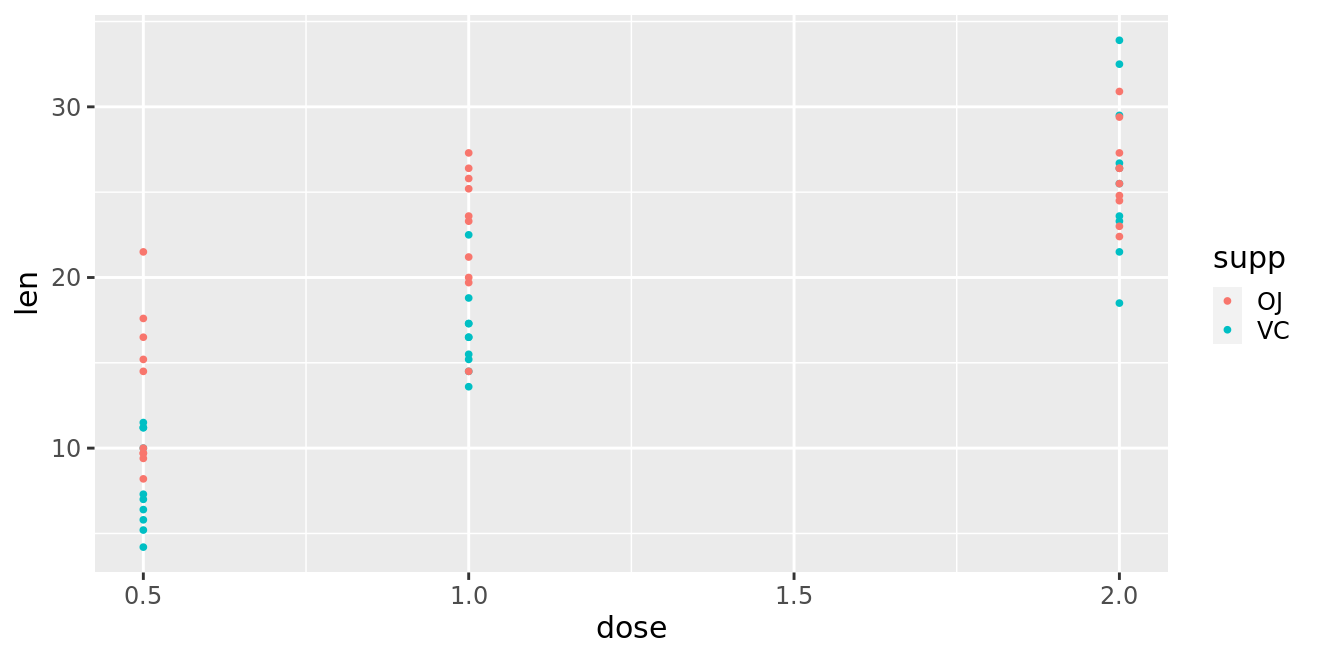

In [51]:
g1 <- ggplot(ToothGrowth,aes(x= dose, y = len , color = supp))
g1 + geom_point()

ビタミンの投与量によって歯の伸びが違うが、種類の影響は微妙？

In [49]:
res <- aov(len ~ dose + supp, data = ToothGrowth)

In [50]:
summary(res)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         1 2224.3  2224.3  123.99 6.31e-16 ***
supp         1  205.3   205.3   11.45   0.0013 ** 
Residuals   57 1022.6    17.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

種類も有意差あるって結果。

投与量が少ない時に2種類の影響に差があるからか。

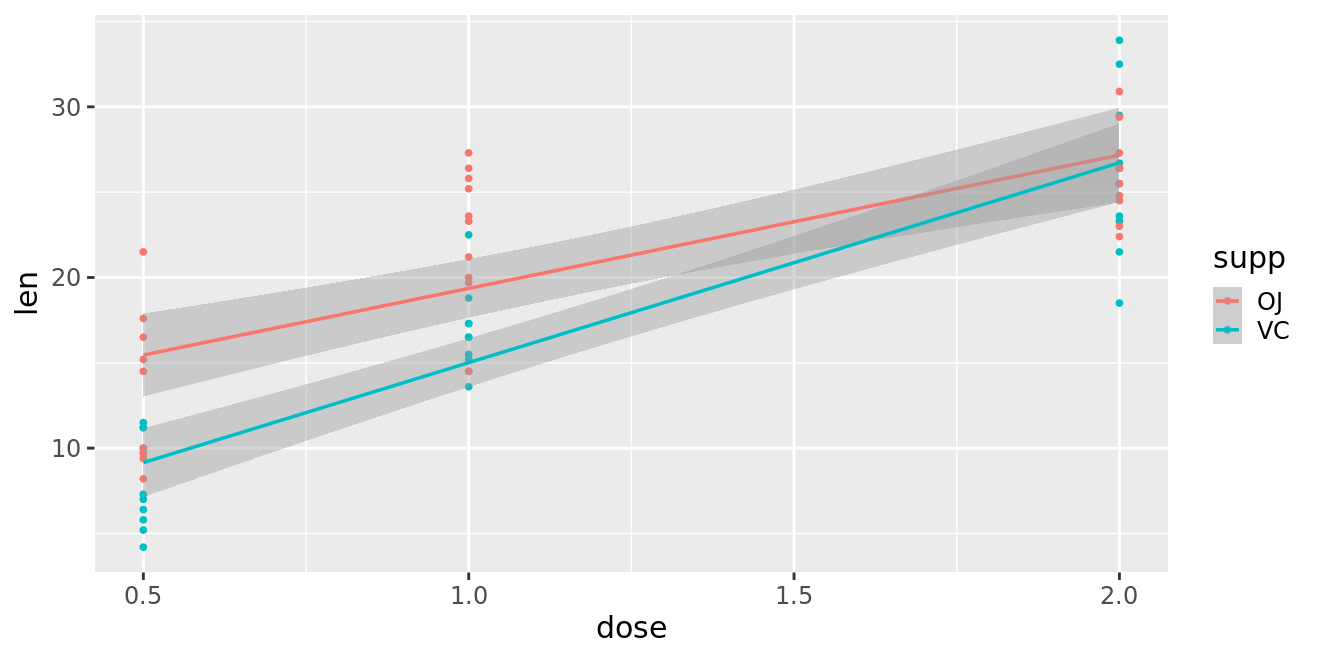

In [54]:
g1 + geom_point() + stat_smooth(method = "lm", formula = "y ~ x")

低量ではOJの方が歯の伸びが大きく、投与量2ではほぼ差がない。

In [56]:
coef(res) %>% data.frame

,.
,<dbl>
(Intercept),9.272500
dose,9.763571
suppVC,-3.700000
